In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from numpy.typing import ArrayLike
from typing import Callable
plt.style.use("ggplot")

In [16]:
features, _ = make_blobs(
    n_samples=1000,
    centers=5,
    cluster_std=0.7,
    random_state=0
    )

In [17]:
features.shape

(1000, 2)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

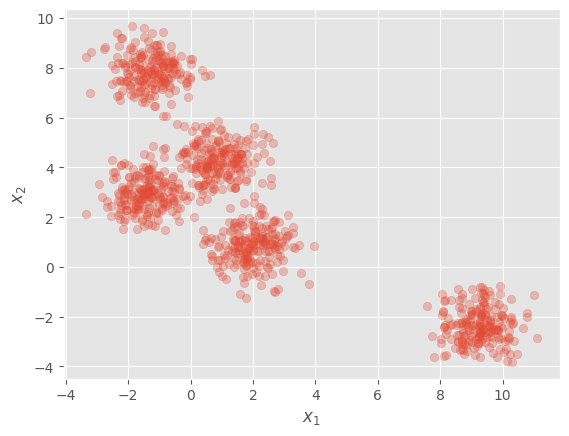

In [18]:
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

1. Seleccionar K puntos al azar del conjunto de datos.
2. Asignar cada punto del conjunto de datos a su prototipo mas cercano.
3. Recalcular cada prototipo como el promedio de puntos asignados a cada grupo.
4. Repetimos 2. hasta alguna condicion de terminacion.

In [22]:
def model_fn(points: ArrayLike, prototypes: ArrayLike) -> ArrayLike:
    dists = euclidean_distances(points, prototypes) # (N, K)
    assigns = np.argmin(dists, axis=1) # (N, )
    return assigns

In [25]:
prototypes = np.array([
    [4, -2],
    [-2, 6.]
])
assigns = model_fn(features, prototypes)

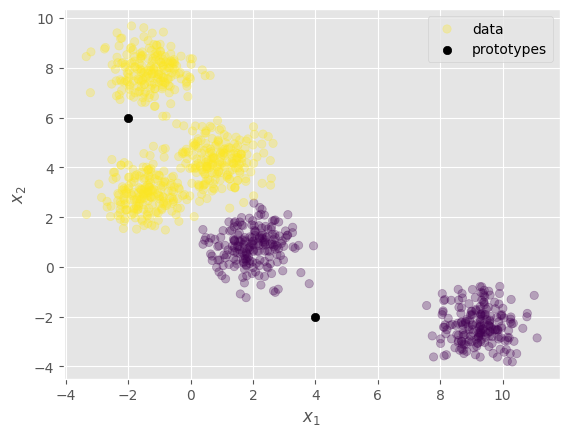

In [26]:
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], alpha=0.3, c=assigns, label="data")
ax.scatter(prototypes[:, 0], prototypes[:, 1], c="k", label="prototypes")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
ax.legend()

In [28]:
def kmeans(features: ArrayLike, n_clusters: int, n_iters: int) -> ArrayLike:
    ids = np.arange(features.shape[0])
    np.random.shuffle(ids)
    prototypes = features[ids[:n_clusters]]

    for _ in range(n_iters):
        assigns = model_fn(features, prototypes)
        for k in range(n_clusters):
            prototypes[k] = features[assigns == k].mean(axis=0)
    return prototypes

In [29]:
prototypes = kmeans(features, 5, 100)

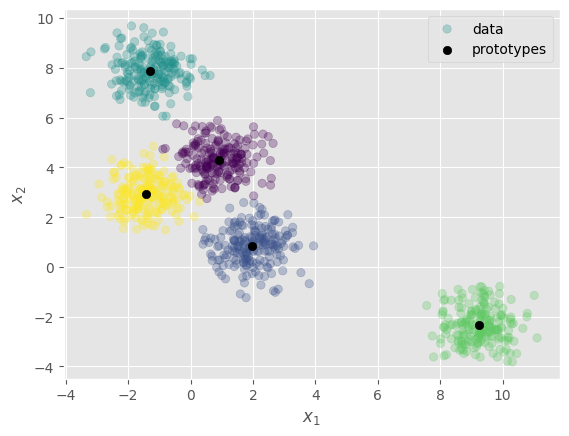

In [31]:
fig, ax = plt.subplots()
assigns = model_fn(features, prototypes)
ax.scatter(features[:, 0], features[:, 1], alpha=0.3, c=assigns, label="data")
ax.scatter(prototypes[:, 0], prototypes[:, 1], c="k", label="prototypes")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
ax.legend()